# Neural Network

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from classifiers.neural_net import TwoLayerNet
from util.gradient_check import eval_numerical_gradient
from util.data_utils import load_CIFAR10
from util.vis_utils import visualize_grid

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))
np.set_printoptions(formatter={'float': lambda x: format(x, '6.3E')})

In [3]:
# toy data to verify the implementation

input_size = 4
hidden_size = 10
num_classes = 3
num_examples = 5

def toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_examples, input_size)
    y = np.array([0, 1, 2, 2, 1])
    # y = np.random.randint(num_classes, size=num_examples)
    return X, y

In [4]:
net = toy_model()
X, y = toy_data()
# print(net.params)

## Foward pass: Scores & Loss
Using weights and biases compute scores for all inputs and loss.

In [5]:
def error(a, b):
    print(np.sum(np.abs(a - b)))

scores = net.loss(X)
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])

loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

error(loss, correct_loss)
error(scores, correct_scores)

1.79856129989e-13
3.68027207459e-08


## Backward pass: Gradients
Use backprop to compute gradients on weights and biases of each layer. Perform gradient check using numerical gradient. 

In [259]:
loss, grads = net.loss(X, y, reg=0.1)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
b2 max relative error: 4.447646e-11
W2 max relative error: 3.440708e-09


## Train the network
Stochastic Gadient Descent (SGD), to minimize the loss function

Final training loss:  0.0171496079387


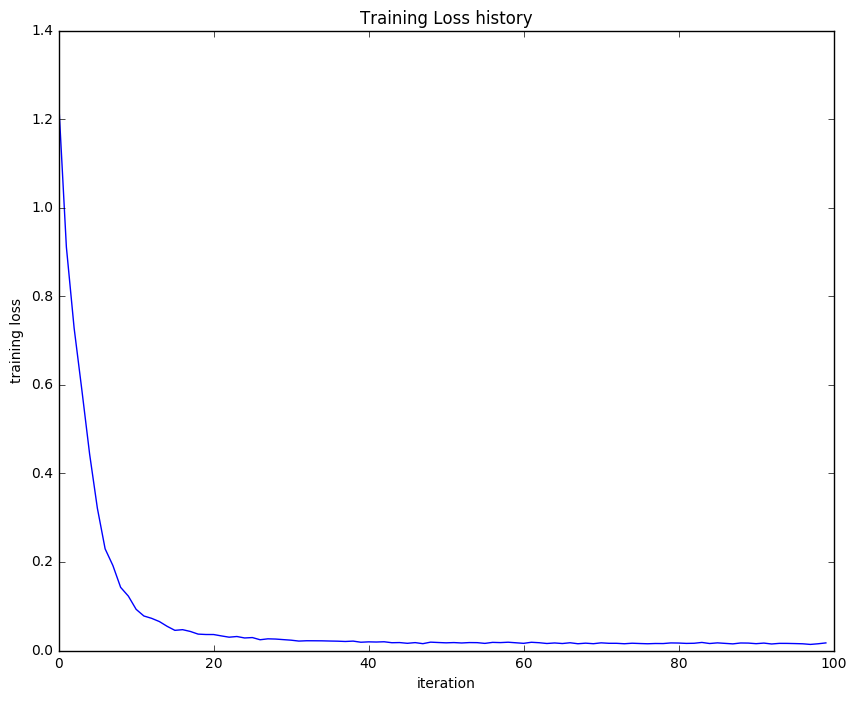

In [291]:
net = toy_model()
stats = net.train(X, y, X, y, learning_rate=1e-1, reg=1e-5, num_iters=100)

print('Final training loss: ', stats[0][-1])

# plot the loss history
plt.plot(stats[0])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [278]:
net.predict(X)

array([0, 1, 2, 2, 1])

## Load the data
Load CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [2]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'util/datasets/cifar-10-batches-py'
    Xtrain, ytrain, Xtest, ytest = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = range(num_training, num_training + num_validation)
    Xval = Xtrain[mask]
    yval = ytrain[mask]
    mask = range(num_training)
    Xtrain = Xtrain[mask]
    ytrain = ytrain[mask]
    mask = range(num_test)
    Xtest = Xtest[mask]
    ytest = ytest[mask]
    
    # Preprocessing: reshape the image data into rows
    Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], -1))
    Xval = np.reshape(Xval, (Xval.shape[0], -1))
    Xtest = np.reshape(Xtest, (Xtest.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(Xtrain, axis=0)
    Xtrain -= mean_image
    Xval -= mean_image
    Xtest -= mean_image
    
    return Xtrain, ytrain, Xval, yval, Xtest, ytest

Xtrain, ytrain, Xval, yval, Xtest, ytest = get_CIFAR10_data()

## Train the network

In [3]:
# Train the network
input_size = 32 * 32 * 3
hidden_size = 150
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
# Xtiny, ytiny = Xtrain[:100], ytrain[:100]
stats = net.train(Xtrain, ytrain, Xval, yval,
            num_iters=4000, batch_size=200,
            learning_rate=4.15E-04, learning_rate_decay=0.99,
            reg=1.31E-01, verbose=True)

iteration 0 / 4000: loss 2.3028822964665876, train accuracy 0.16, val accuracy 0.11
iteration 100 / 4000: loss 2.128401445147711, train accuracy 0.21, val accuracy 0.219
iteration 200 / 4000: loss 1.924855508817151, train accuracy 0.305, val accuracy 0.285
iteration 300 / 4000: loss 1.8786115579912122, train accuracy 0.355, val accuracy 0.344
iteration 400 / 4000: loss 1.7607314719587253, train accuracy 0.37, val accuracy 0.36
iteration 500 / 4000: loss 1.7025949714357007, train accuracy 0.405, val accuracy 0.38
iteration 600 / 4000: loss 1.642473832154313, train accuracy 0.415, val accuracy 0.39
iteration 700 / 4000: loss 1.8345509582336914, train accuracy 0.36, val accuracy 0.435
iteration 800 / 4000: loss 1.6136487625691218, train accuracy 0.47, val accuracy 0.442
iteration 900 / 4000: loss 1.6575251769576034, train accuracy 0.48, val accuracy 0.442
iteration 1000 / 4000: loss 1.4898103438865469, train accuracy 0.52, val accuracy 0.435
iteration 1100 / 4000: loss 1.5983929387394973,

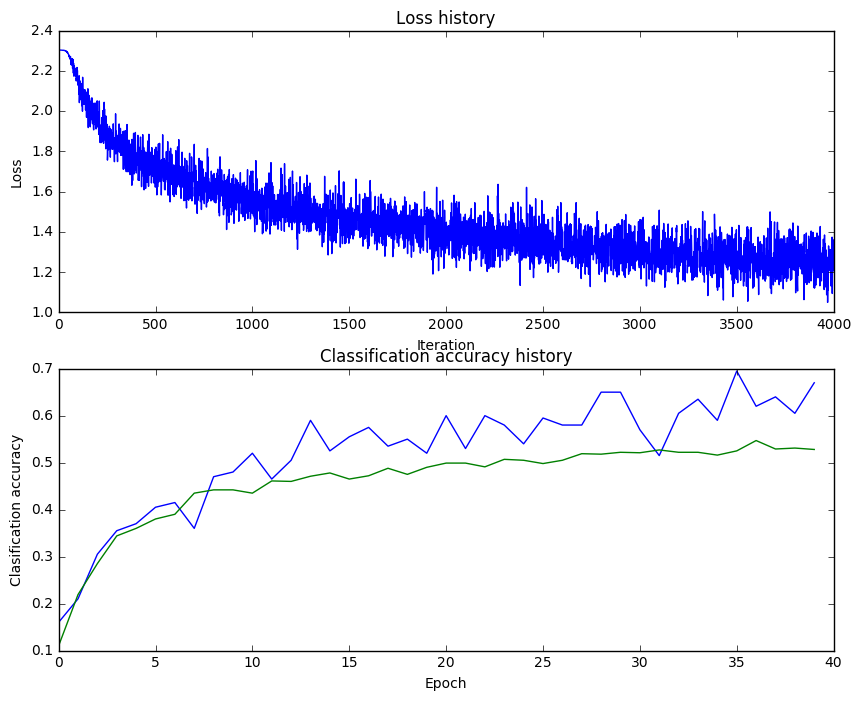

In [6]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats[0])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats[1], label='train')
plt.plot(stats[2], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

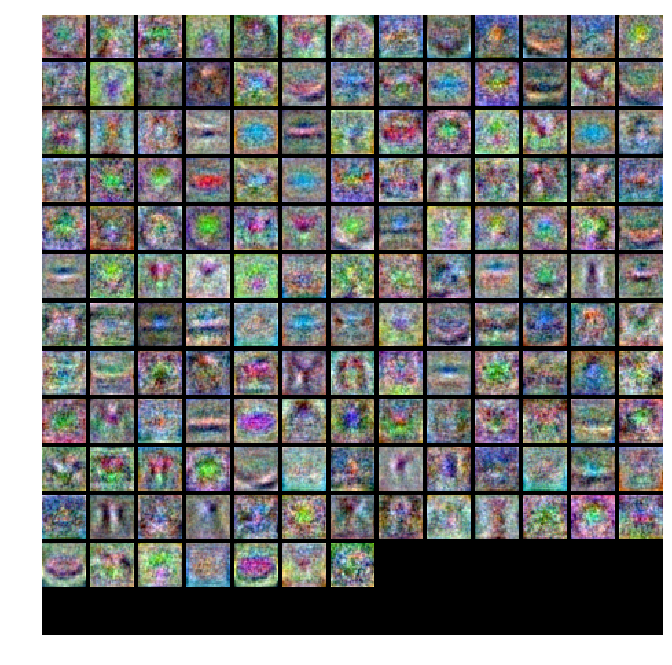

In [5]:
# Visualize the weights of the network
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)


## Tune the hyperparameters

In [4]:
for itr in range(30):
    input_size = 32 * 32 * 3
    hidden_size = 150
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    
    # sample uniform params
    lr = 10**np.random.uniform(-3, -4)
    reg = 10**np.random.uniform(-2, 0)
    
    # Train the network
    stats = net.train(Xtrain, ytrain, Xval, yval,
                num_iters=4000, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.99,
                reg=reg, verbose=False)
    
    # train_acc = (net.predict(Xtrain) == ytrain).mean()
    val_acc = (net.predict(Xval) == yval).mean()
    print('{}. val_acc: {}, reg: {:.2E}, lr: {:.2E}'.format(itr, val_acc, reg, lr))

val_acc: 0.507, reg: 5.49E-02, lr: 4.98E-04
val_acc: 0.519, reg: 1.08E-01, lr: 6.66E-04
val_acc: 0.541, reg: 1.31E-01, lr: 4.15E-04
val_acc: 0.471, reg: 4.11E-01, lr: 1.47E-04
val_acc: 0.479, reg: 8.72E-01, lr: 1.98E-04
val_acc: 0.51, reg: 1.56E-02, lr: 3.52E-04
val_acc: 0.456, reg: 1.23E-01, lr: 1.06E-04
val_acc: 0.531, reg: 3.74E-01, lr: 5.58E-04
val_acc: 0.496, reg: 5.53E-02, lr: 2.02E-04
val_acc: 0.522, reg: 6.48E-02, lr: 2.76E-04
val_acc: 0.53, reg: 2.68E-01, lr: 6.69E-04
val_acc: 0.514, reg: 2.19E-01, lr: 5.70E-04
val_acc: 0.492, reg: 7.54E-02, lr: 2.47E-04
val_acc: 0.5, reg: 6.00E-01, lr: 2.25E-04
val_acc: 0.499, reg: 6.02E-02, lr: 2.36E-04
val_acc: 0.52, reg: 3.97E-02, lr: 9.71E-04
val_acc: 0.464, reg: 1.39E-02, lr: 1.23E-04
val_acc: 0.513, reg: 1.82E-02, lr: 2.83E-04
val_acc: 0.474, reg: 4.90E-01, lr: 1.60E-04
val_acc: 0.514, reg: 2.52E-02, lr: 2.97E-04
val_acc: 0.493, reg: 5.51E-01, lr: 2.47E-04
val_acc: 0.459, reg: 1.07E-02, lr: 1.33E-04
val_acc: 0.54, reg: 6.72E-02, lr: 8.5

# Run on the test set

In [4]:
test_acc = (net.predict(Xtest) == ytest).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.533
